In [18]:
from SafeTransformer1 import SafeTransformer

In [19]:
from sklearn.datasets import load_boston

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
import pandas as pd

In [22]:
surrogate_model = GradientBoostingRegressor(n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    loss='huber')

In [23]:
data = load_boston()

In [24]:
X = data['data']

In [25]:
names = data.feature_names
X = pd.DataFrame(X, columns=names)

In [26]:
y = data['target']

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pens = np.linspace(0.01, 10, 25)
best_score = float('Inf')
best_pen = 0
X_train, X_test, y_train, y_test = train_test_split(X, y)
linear_model_standard = LinearRegression()
linear_model_standard = linear_model_standard.fit(X_train, y_train)
standard_predictions = linear_model_standard.predict(X_test)
        

In [29]:
errors = []
surrogate_model = surrogate_model.fit(X_train, y_train)
for pen in pens:
    
    safe_transformer = SafeTransformer()

    safe_transformer = safe_transformer.fit(pd.DataFrame(X_train), surrogate_model, penalty = pen)

    X_train_transformed = safe_transformer.transform(X_train)

    X_test_transformed = safe_transformer.transform(X_test)

    linear_model_transformed = LinearRegression()

    linear_model_transformed = linear_model_transformed.fit(X_train_transformed, y_train)

    surrogate_predictions = linear_model_transformed.predict(X_test_transformed)
    error = mean_squared_error(y_test, surrogate_predictions)
    errors.append(error)
    print(mean_squared_error(y_test, standard_predictions), error)
    if error < best_score:
        best_score = error
        best_pen = pen

24.547752068722634 1.9164379557273835e+24
24.547752068722634 15.68545137040453
24.547752068722634 17.566167193225628
24.547752068722634 16.062122555644258
24.547752068722634 15.498301566531751
24.547752068722634 14.807768068592715
24.547752068722634 14.772376080503609
24.547752068722634 13.154864103290283
24.547752068722634 13.051198852698635
24.547752068722634 12.552726241145654
24.547752068722634 12.819417724155466
24.547752068722634 12.706059661010446
24.547752068722634 12.411468149103293
24.547752068722634 12.239353101767962
24.547752068722634 12.271122606571579
24.547752068722634 12.102734668851998
24.547752068722634 12.102734668851998
24.547752068722634 12.101305704196212
24.547752068722634 12.119625877332258
24.547752068722634 12.038818043934908
24.547752068722634 11.741864872240056
24.547752068722634 13.899540598890415
24.547752068722634 13.899540598890415
24.547752068722634 13.899540598890415
24.547752068722634 13.768026574171662


In [35]:
gb_predictions = surrogate_model.predict(X_test)
print(mean_squared_error(y_test, gb_predictions))

10.081060234163527


In [40]:
import matplotlib.pyplot as plt

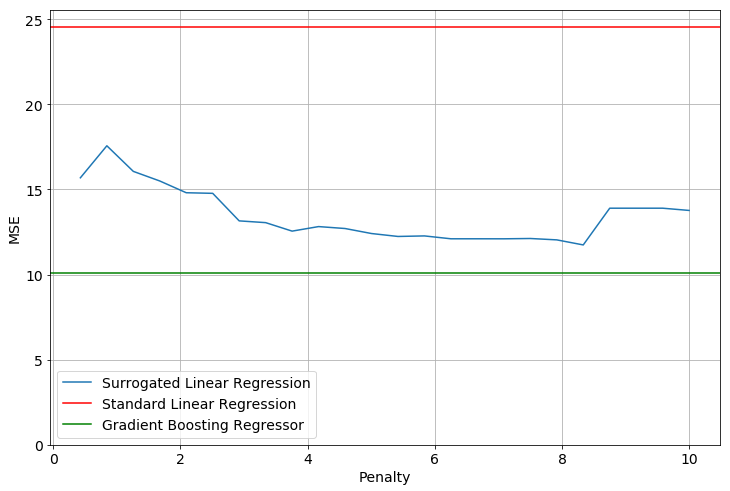

In [45]:
standard_error = mean_squared_error(y_test, standard_predictions)
xgb_error = mean_squared_error(y_test, gb_predictions)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 14})
plt.plot(pens[1:], errors[1:], label='Surrogated Linear Regression')
plt.xlabel('Penalty')
plt.ylabel('MSE')
plt.grid(True)
plt.axhline(standard_error, color='r', label='Standard Linear Regression')
plt.axhline(xgb_error, color='g', label='Gradient Boosting Regressor')
plt.ylim((0, max(max(errors[1:])+1, standard_error+1)))
plt.legend()
plt.show()

In [46]:
best_pen

8.334999999999999

In [47]:
X_train_transformed

,"CRIM_[16.93, 33.40)","CRIM_[33.40, Inf)","CHAS_[0.50, Inf)","NOX_[0.60, 0.67)","NOX_[0.67, 0.70)","NOX_[0.70, Inf)","RM_[5.57, 6.07)","RM_[6.07, 6.54)","RM_[6.54, 6.77)","RM_[6.77, 6.93)",...,"B_[105.52, Inf)","LSTAT_[4.73, 5.43)","LSTAT_[5.43, 7.55)","LSTAT_[7.55, 9.67)","LSTAT_[9.67, 9.85)","LSTAT_[9.85, 11.79)","LSTAT_[11.79, 14.79)","LSTAT_[14.79, 19.90)","LSTAT_[19.90, 28.72)","LSTAT_[28.72, Inf)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
